![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

#cross-validation
from sklearn.model_selection import cross_val_score

#classification 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

#classifier evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Step 4 - Classification I: Intitial Findings
# Original & Resampled Data
    a) Importing Data
    
    b) Resampling
        i) Random Over Sampling
       ii) Random Under Sampling  
       
    c) Classification
        i) Original Data
            - Naive Bayes
            - Logistic Regression
            - KNN
            - SVM
       ii) Over-Sampled Data
            - Naive Bayes
            - Logistic Regression
            - KNN
            - SVM
      iii) Under-Sampled Data
            - Naive Bayes
            - Logistic Regression
            - KNN
            - SVM

## a) Importing data

In [2]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)

(114898, 22)


In [3]:
#import corpus_data.csv file
corpus_df = pd.read_csv("corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head()

(114898, 1)


,blurb
0,educating community self sufficiency building ...
1,rewarding thing event attend
2,thema literary society proposes publish one th...
3,cnc crafted billet aluminum unique sophisticat...
4,collection hand lettered thing say idea sentim...


In [4]:
#append corpus blurb to cleaned2_df
cleaned2_df['blurb_corpus'] = corpus_df['blurb']
cleaned2_df.head(1)

,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state,success_percentage,blurb_corpus
0,1526833653,Living Life Tiny,Architecture,design,"{""id"":258,""name"":""Architecture"",""slug"":""design...",https://www.kickstarter.com/discover/categorie...,Educating my community about self-sufficiency ...,living-life-tiny,500,577,...,US,USD,13,0,0,1,0,successful,115.4,educating community self sufficiency building ...


In [5]:
#locate NaN
is_NaN = cleaned2_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cleaned2_df[row_has_NaN]

#remove NaN
cleaned2_df = cleaned2_df.dropna()
print(cleaned2_df.isna().sum())
print(cleaned2_df.shape)

id                          0
name                        0
genre                       0
subgenre                    0
category                    0
source_url                  0
blurb                       0
slug                        0
goal                        0
converted_pledged_amount    0
created_at                  0
launched_at                 0
deadline                    0
country                     0
currency                    0
backers_count               0
disable_communication       0
is_starrable                0
spotlight                   0
staff_pick                  0
state                       0
success_percentage          0
blurb_corpus                0
dtype: int64
(114880, 23)


### SPLIT DATA BEFORE RESAMPLING

In [6]:
msk = np.random.rand(len(cleaned2_df)) < 0.75

train_df = cleaned2_df[msk]
test_df = cleaned2_df[~msk]

In [7]:
print(len(test_df))
print(len(train_df))

28666
86214


In [8]:
#split test into X_test and y_test for later
y_test = test_df['state']
X_test = test_df.drop('state',axis=1)

## b) Resampling

In [9]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(train_df['state'].unique())
train_df.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(train_df['state'].unique())

['failed' 'successful']
[0 1]


C:\Users\vlad_\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
#change successful:1 / failed:0 in state column (y-dependent-variable)
print(test_df['state'].unique())
test_df.state.replace(['successful', 'failed'], [1, 0], inplace=True)
print(test_df['state'].unique())

['successful' 'failed']
[1 0]


In [11]:
train_df['state'].value_counts()

1    59809
0    26405
Name: state, dtype: int64

In [12]:
#class count
count_class_1, count_class_0 = train_df.state.value_counts()

#divide by class
df_class_0 = train_df[train_df['state'] == 0]
df_class_1 = train_df[train_df['state'] == 1]

##### i) Random Over-Sampling

Random over-sampling:
1    59809
0    59809
Name: state, dtype: int64


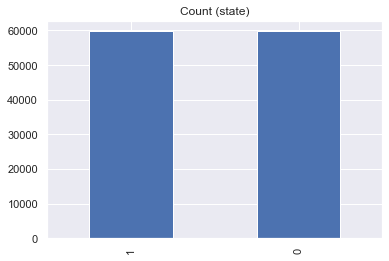

In [13]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.state.value_counts())

df_test_over.state.value_counts().plot(kind='bar', title='Count (state)')

##### ii) Random under-sampling

Random under-sampling:
1    26405
0    26405
Name: state, dtype: int64


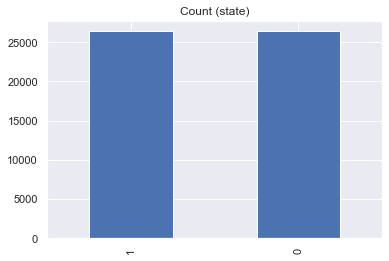

In [14]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
df_test_under['state'].value_counts()
print('Random under-sampling:')
print(df_test_under.state.value_counts())

df_test_under.state.value_counts().plot(kind='bar', title='Count (state)')

## c) Classification

The following lines will include classification algorithms using 3 types of data: the original data with outliers removed, oversampled data, and undersampled data.

### i) Original Data

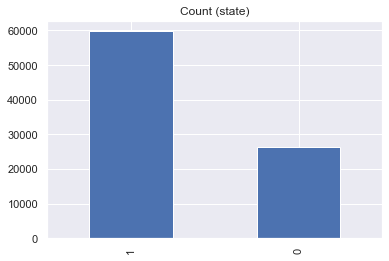

In [15]:
train_df.state.value_counts().plot(kind='bar', title='Count (state)');

In [16]:
#split into X_train and y_train
y_train = train_df['state']
X_train = train_df.drop('state',axis=1)

In [17]:
#use all n-grams(2) from train set in bag of words model
cv = CountVectorizer(ngram_range = (2, 2)) 
X_vec_train = cv.fit_transform(X_train['blurb_corpus'])
X_vec_train.shape

(86214, 545791)

In [18]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_vec_train)
train_tfidf.shape

(86214, 545791)

In [19]:
#use all n-grams(2) from test set in bag of words model
X_vec_test = cv.transform(X_test['blurb_corpus'])
X_vec_test.shape

(28666, 545791)

In [20]:
#apply TDIDF on test set
test_tfidf = tfidf_transformer.transform(X_vec_test)
test_tfidf.shape

(28666, 545791)

##### Naive Bayes Classifier

In [21]:
#fitting Naive Bayes Classifier to the training set
nb_classifier = MultinomialNB()
nb_classifier = nb_classifier.fit(train_tfidf, y_train)

#predicting the test set results
predictions = nb_classifier.predict(test_tfidf)

Confusion matrix:
 [[  515  8278]
 [  132 19741]]


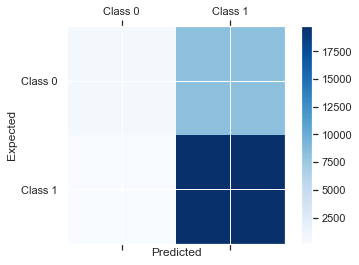

In [22]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [23]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 70.66%
 Precision: 70.46%
    Recall: 99.34%
  F1 score: 82.44%
 ROC score: 52.60%


##### Logistic Regression Classifier

In [24]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(train_tfidf, y_train)

#predicting the test set results
predictions = reg_classifier.predict(test_tfidf)

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[  944  7849]
 [  415 19458]]


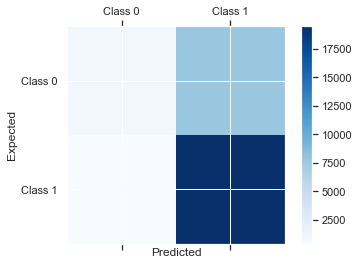

In [25]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [26]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 71.17%
 Precision: 71.26%
    Recall: 97.91%
  F1 score: 82.48%
 ROC score: 54.32%


##### KNN Classifier

In [104]:
#find optimal K-number with cross-validation

#creating odd list of K for KNN
neighbors = list(range(1, 20, 2))

#empty list that will hold cv scores
cv_scores = []

#perform 10-fold cross validation
for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, train_tfidf, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbours is 19


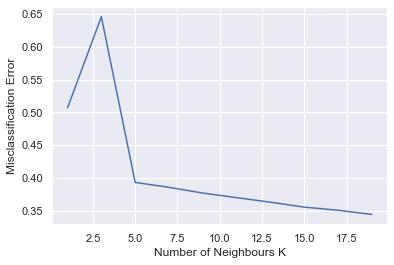

In [105]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbours is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbours K")
plt.ylabel("Misclassification Error")
plt.show()

In [27]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 25, weights = 'distance', metric = 'minkowski', p = 2)
knn_classifier.fit(train_tfidf, y_train)

#predicting the test set results
predictions = knn_classifier.predict(test_tfidf)

Confusion matrix:
 [[  376  8417]
 [  369 19504]]


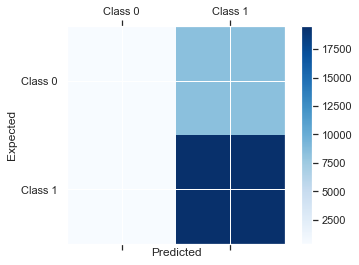

In [28]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [29]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 69.35%
 Precision: 69.85%
    Recall: 98.14%
  F1 score: 81.62%
 ROC score: 51.21%


##### SVM Classifier

In [30]:
#fitting SVM to the training set
svm_classifier = SGDClassifier(loss='hinge', penalty='l1', random_state=0)
svm_classifier.fit(train_tfidf, y_train)

#predicting the test set results
predictions = svm_classifier.predict(test_tfidf)

Confusion matrix:
 [[   80  8713]
 [   31 19842]]


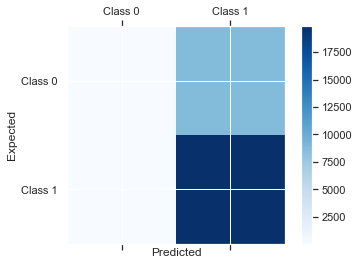

In [31]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [32]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 69.50%
 Precision: 69.49%
    Recall: 99.84%
  F1 score: 81.94%
 ROC score: 50.38%


### ii) Over-sampled data

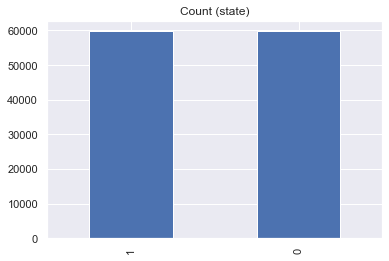

In [33]:
df2_test_over = pd.DataFrame(df_test_over)
df2_test_over.state.value_counts().plot(kind='bar', title='Count (state)');

In [34]:
#split into X_train and y_train
X_over_train = df2_test_over.drop('state',axis=1)
y_over_train = df2_test_over['state']

In [35]:
#use all n-grams(2) from train set in bag of words model
cv = CountVectorizer(ngram_range = (2, 2)) 
X_vec_train = cv.fit_transform(X_over_train['blurb_corpus'])
X_vec_train.shape

(119618, 529149)

In [36]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
train_over_tfidf = tfidf_transformer.fit_transform(X_vec_train)
train_over_tfidf.shape

(119618, 529149)

In [37]:
#use all n-grams(2) from test set in bag of words model
X_vec_test = cv.transform(X_test['blurb_corpus'])
X_vec_test.shape

(28666, 529149)

In [38]:
#apply TDIDF on test set
test_over_tfidf = tfidf_transformer.transform(X_vec_test)
test_over_tfidf.shape

(28666, 529149)

##### Naive Bayes Classifier

In [39]:
##fitting Naive Bayes to the training set
nb_classifier = MultinomialNB()
nb_classifier = nb_classifier.fit(train_over_tfidf, y_over_train)

#predicting the test set results
predictions = nb_classifier.predict(test_over_tfidf)

Confusion matrix:
 [[ 5031  3762]
 [ 4640 15233]]


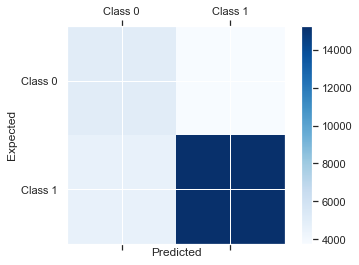

In [40]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 70.69%
 Precision: 80.19%
    Recall: 76.65%
  F1 score: 78.38%
 ROC score: 66.93%


##### Logistic Regression Classifier

In [42]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(train_over_tfidf, y_over_train)

#predicting the test set results
predictions = reg_classifier.predict(test_over_tfidf)

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[ 3820  4973]
 [ 3118 16755]]


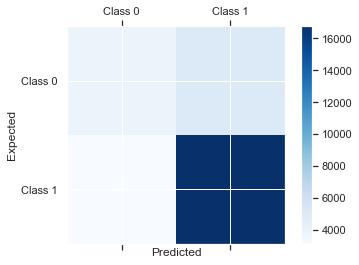

In [43]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [44]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 71.77%
 Precision: 77.11%
    Recall: 84.31%
  F1 score: 80.55%
 ROC score: 63.88%


##### KNN Classifier

In [ ]:
#find optimal K-number with cross-validation

#creating odd list of K for KNN
neighbors = list(range(1, 15, 2))

#empty list that will hold cv scores
cv_scores = []

#perform 10-fold cross validation
for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, train_over_tfidf, y_over_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbours is 5


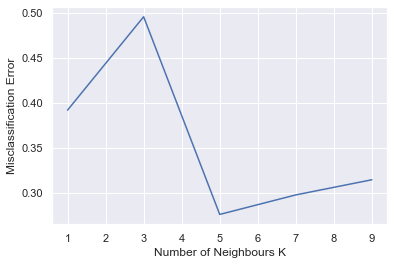

In [52]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbours is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbours K")
plt.ylabel("Misclassification Error")
plt.show()

In [45]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'minkowski', p = 2)
knn_classifier.fit(train_over_tfidf, y_over_train)

#predicting the test set results
predictions = knn_classifier.predict(test_over_tfidf)

Confusion matrix:
 [[ 4118  4675]
 [ 6667 13206]]


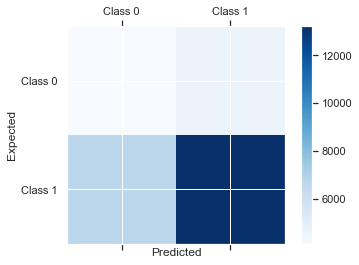

In [46]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [47]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 60.43%
 Precision: 73.85%
    Recall: 66.45%
  F1 score: 69.96%
 ROC score: 56.64%


##### SVM Classifier

In [50]:
#fitting SVM to the training set
svm_classifier = SGDClassifier(loss='hinge', penalty='l2', random_state=0)
svm_classifier.fit(train_over_tfidf, y_over_train)

#predicting the test set results
predictions = svm_classifier.predict(test_over_tfidf)

Confusion matrix:
 [[ 7880   913]
 [14378  5495]]


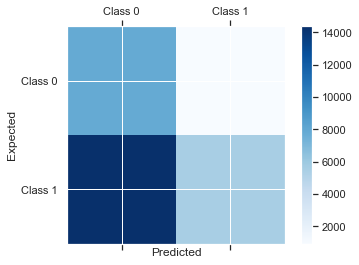

In [51]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [52]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 46.66%
 Precision: 85.75%
    Recall: 27.65%
  F1 score: 41.82%
 ROC score: 58.63%


### iii) Under-sampled data

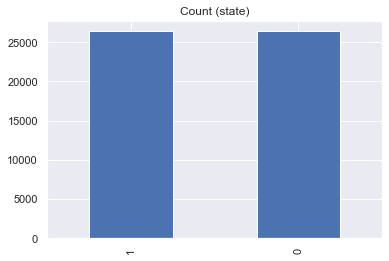

In [53]:
df2_test_under = pd.DataFrame(df_test_under)
df2_test_under.state.value_counts().plot(kind='bar', title='Count (state)')

In [54]:
#split into X_train and y_train
X_under_train = df2_test_under.drop('state',axis=1)
y_under_train = df2_test_under['state']

In [55]:
#use all n-grams(2) from train set in bag of words model
cv = CountVectorizer(ngram_range = (2, 2)) 
X_vec_train = cv.fit_transform(X_under_train['blurb_corpus'])
X_vec_train.shape

(52810, 379578)

In [56]:
#apply TDIDF on train set
tfidf_transformer = TfidfTransformer()
train_under_tfidf = tfidf_transformer.fit_transform(X_vec_train)
train_under_tfidf.shape

(52810, 379578)

In [57]:
#use all n-grams(2) from test set in bag of words model
X_vec_test = cv.transform(X_test['blurb_corpus'])
X_vec_test.shape

(28666, 379578)

In [58]:
#apply TDIDF on test set
test_under_tfidf = tfidf_transformer.transform(X_vec_test)
test_under_tfidf.shape

(28666, 379578)

##### Naive Bayes Classifier

In [59]:
#fitting Naive Bayes to the training set
nb_classifier = MultinomialNB()
nb_classifier = nb_classifier.fit(train_under_tfidf, y_under_train)

#predicting the test set results
predictions = nb_classifier.predict(test_under_tfidf)

Confusion matrix:
 [[ 5647  3146]
 [ 6487 13386]]


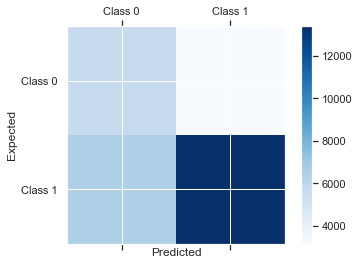

In [60]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [61]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 66.40%
 Precision: 80.97%
    Recall: 67.36%
  F1 score: 73.54%
 ROC score: 65.79%


##### Logistic Regression

In [62]:
#fitting Logistic Regression to the training set
reg_classifier = LogisticRegression()
reg_classifier.fit(train_under_tfidf, y_under_train)

#predicting the test set results
predictions = reg_classifier.predict(test_under_tfidf)

C:\Users\vlad_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[ 6168  2625]
 [ 7752 12121]]


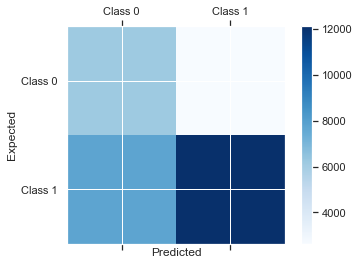

In [63]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [64]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 63.80%
 Precision: 82.20%
    Recall: 60.99%
  F1 score: 70.03%
 ROC score: 65.57%


##### KNN Classifier

In [71]:
#find optimal K-number with cross-validation

#creating odd list of K for KNN
neighbors = list(range(1, 20, 2))

#empty list that will hold cv scores
cv_scores = []

#perform 10-fold cross validation
for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, train_under_tfidf, y_under_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbours is 19


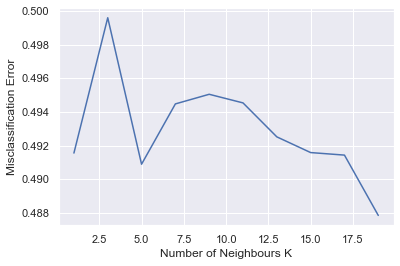

In [72]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbours is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbours K")
plt.ylabel("Misclassification Error")
plt.show()

In [73]:
#fitting KNN to the training set
knn_classifier = KNeighborsClassifier(n_neighbors = 19, weights = 'distance', metric = 'minkowski', p = 2)
knn_classifier.fit(train_under_tfidf, y_under_train)

#predicting the test set results
prediction = knn_classifier.predict(test_under_tfidf)

Confusion matrix:
 [[4049 1607]
 [8757 5242]]


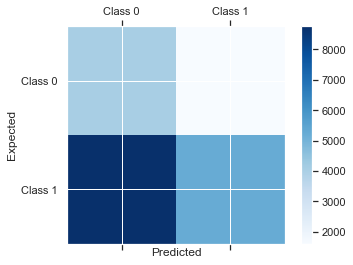

In [74]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [75]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 62.00%
 Precision: 82.60%
    Recall: 59.09%
  F1 score: 68.90%
 ROC score: 64.15%


##### SVM Classifier

In [71]:
#fitting SVM to the training set
svm_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=0)
svm_classifier.fit(train_under_tfidf, y_under_train)

#predicting the test set results
predictions = svm_classifier.predict(test_under_tfidf)

Confusion matrix:
 [[    9  8784]
 [    2 19871]]


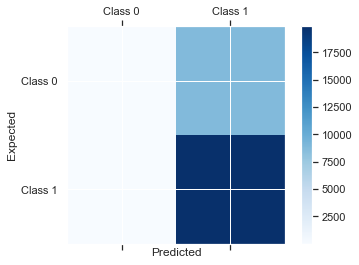

In [72]:
#confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [73]:
#calculate accuracy/precision/recall/f1

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, predictions)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))

#ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

  Accuracy: 69.35%
 Precision: 69.35%
    Recall: 99.99%
  F1 score: 81.89%
 ROC score: 50.05%


### End of Step 4